In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
import cartopy.crs as ccrs
import cartopy.feature as cf

In [2]:
# 設置文件夾保存圖像
output_folder = "avhrr_sst_images"
os.makedirs(output_folder, exist_ok=True)

### set date

In [3]:
# 設定範圍和條件
import glob

# 將日期定義為變量
date = "201010"
dtype = "test_data"
start_date = "2010-10-22"
end_date = "2010-10-31"

# 經緯度設定
extent = [108, 124, 10, 25]

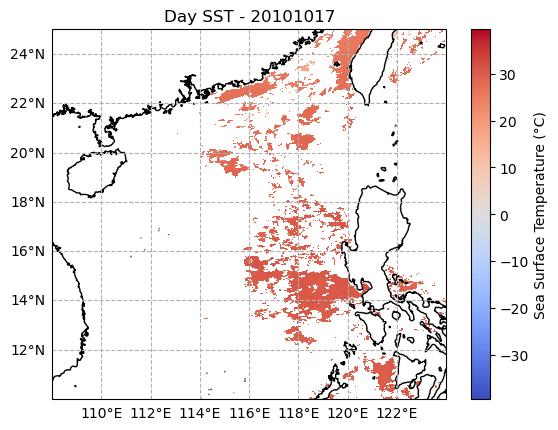

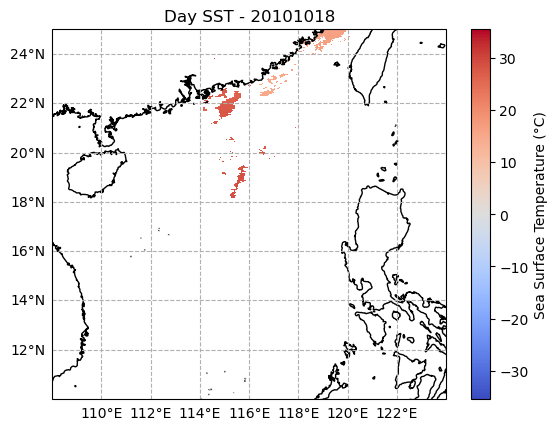

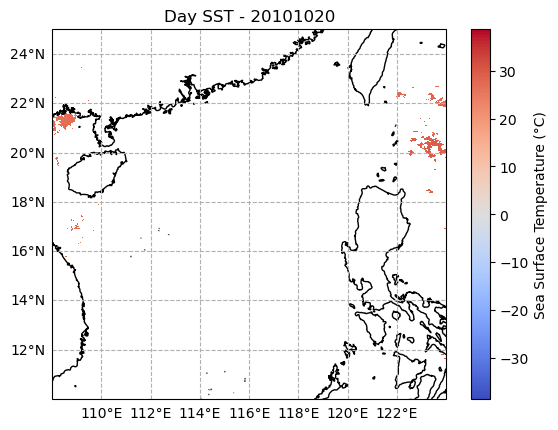

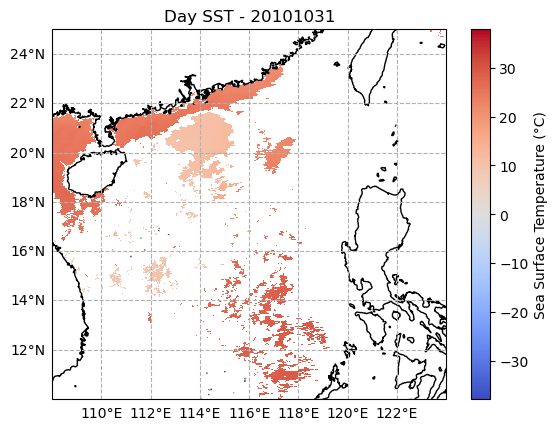

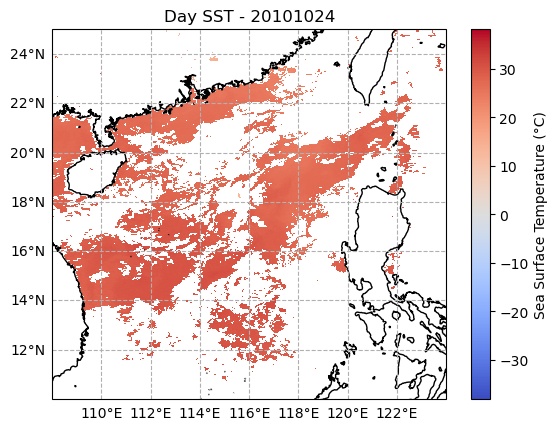

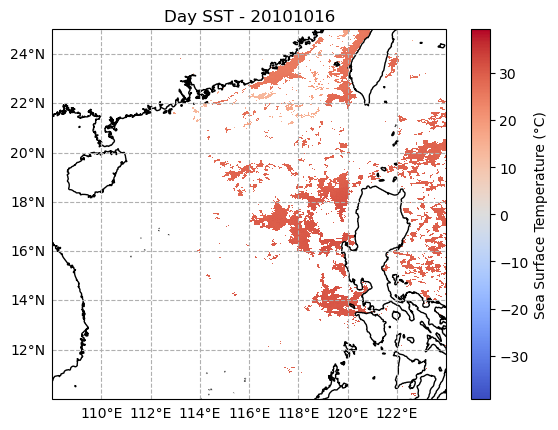

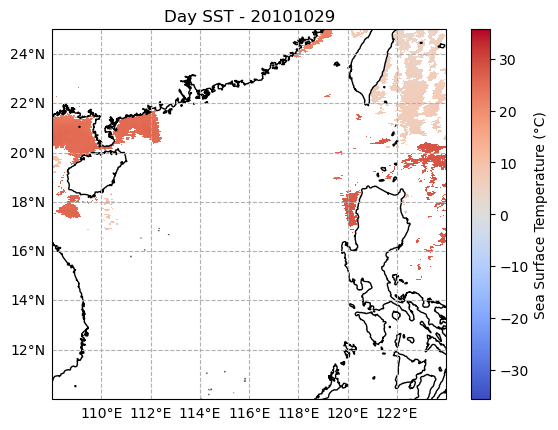

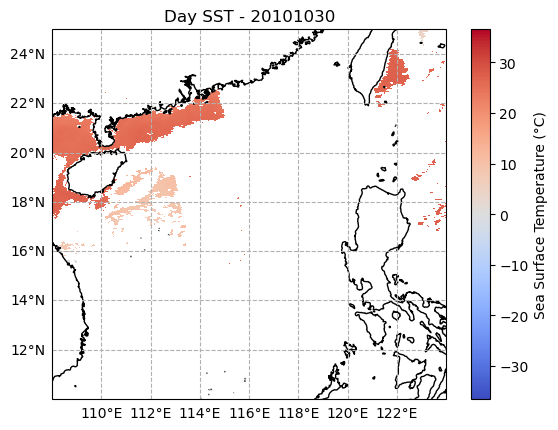

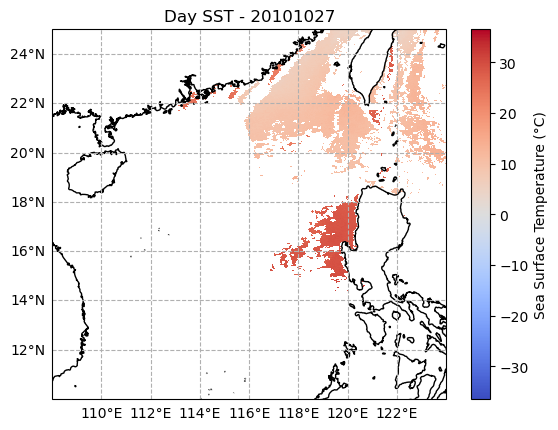

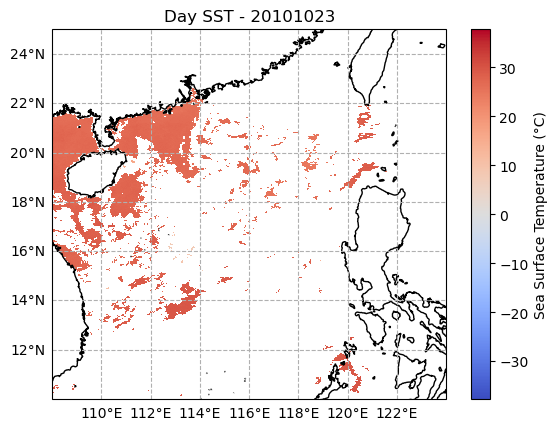

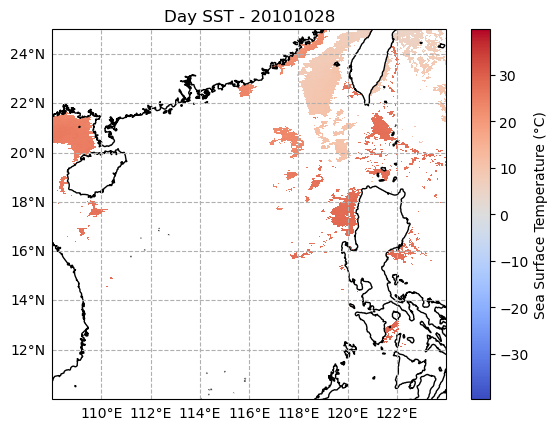

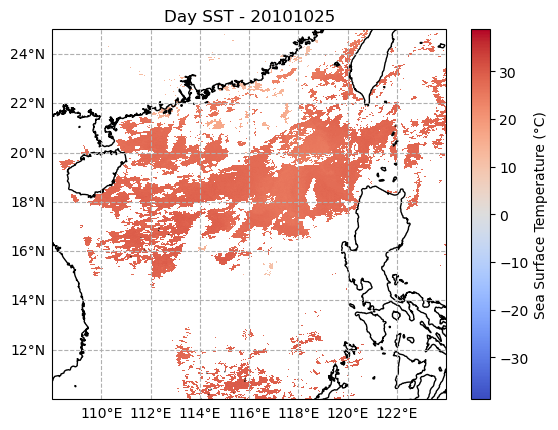

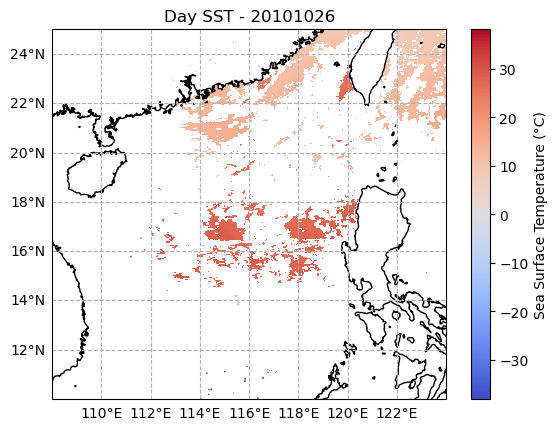

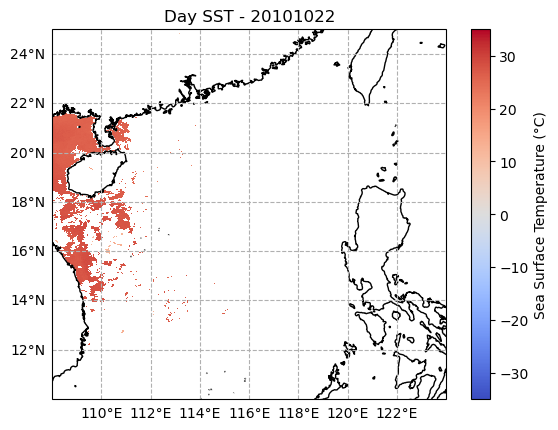

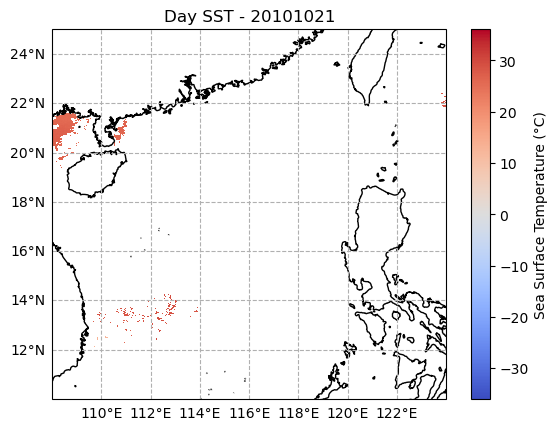

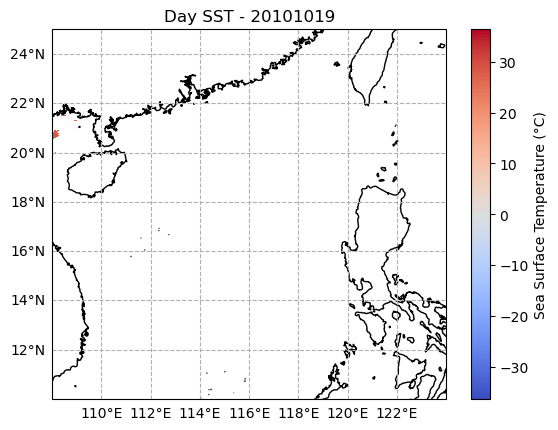

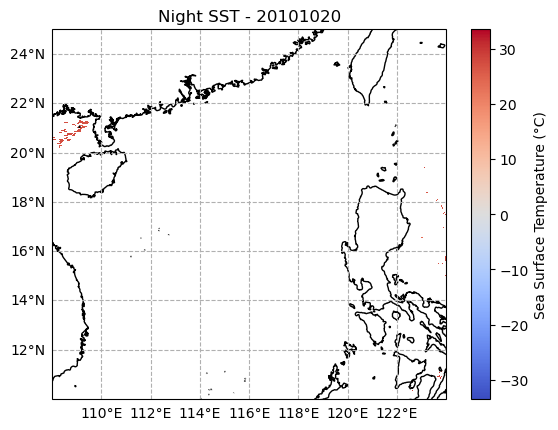

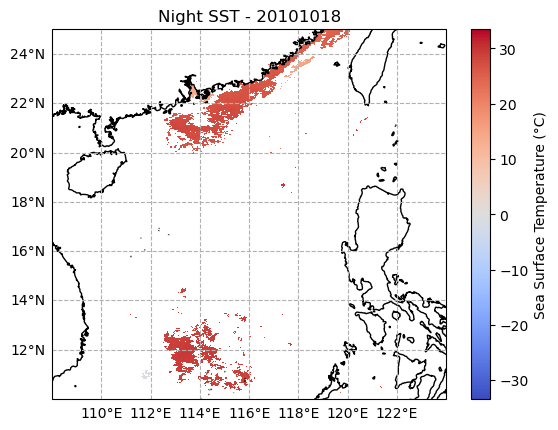

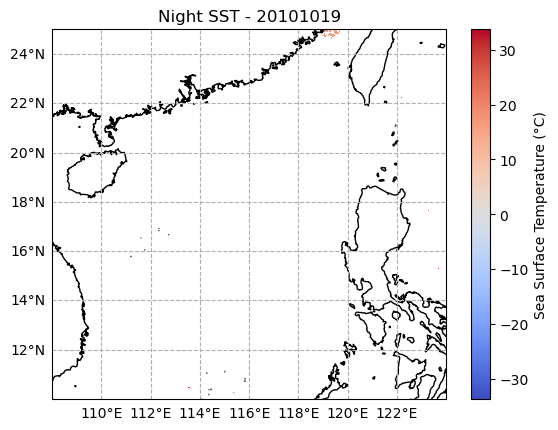

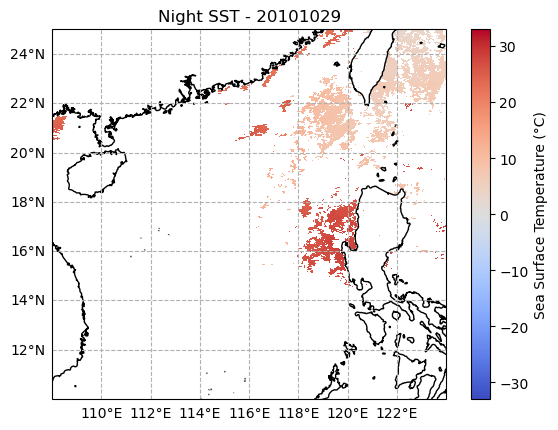

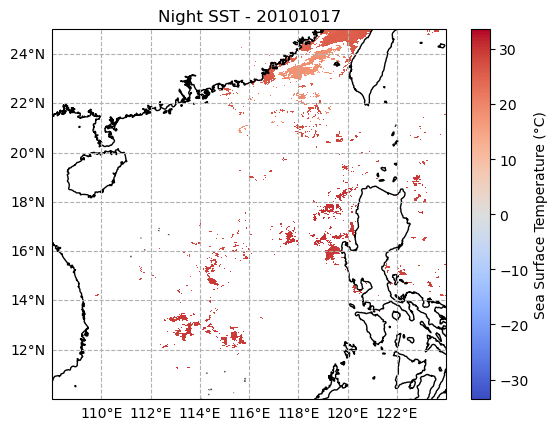

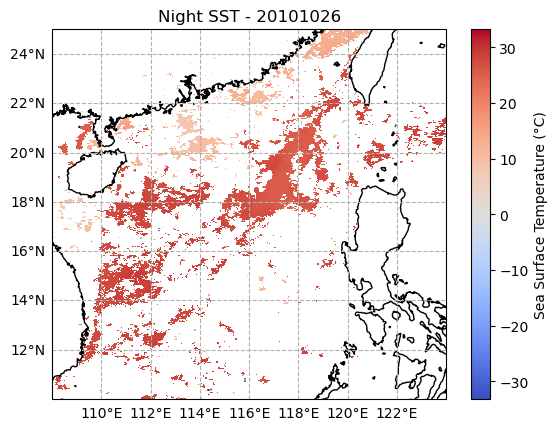

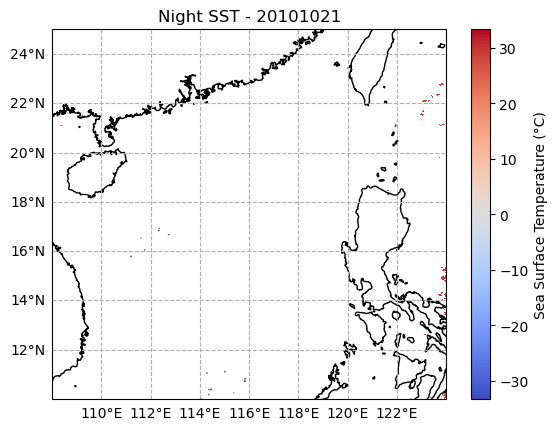

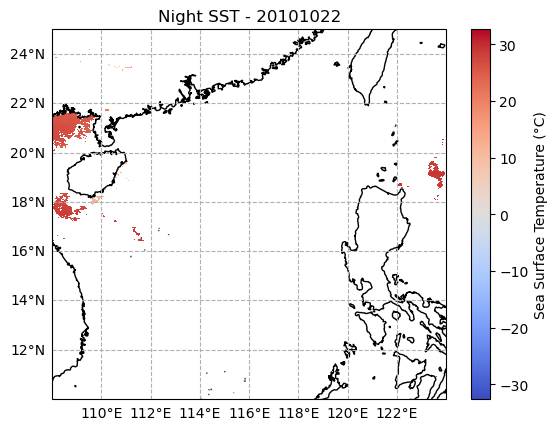

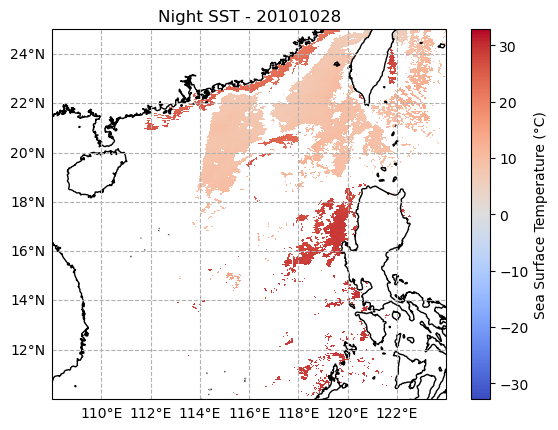

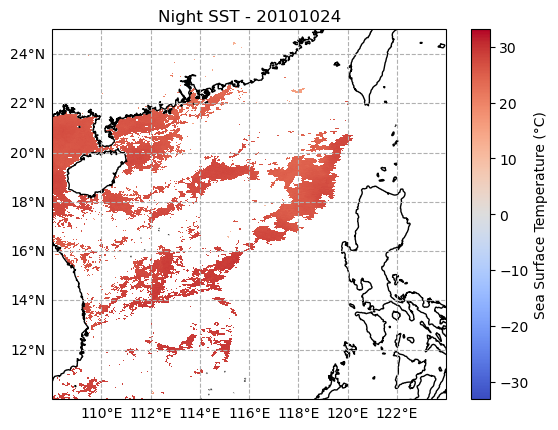

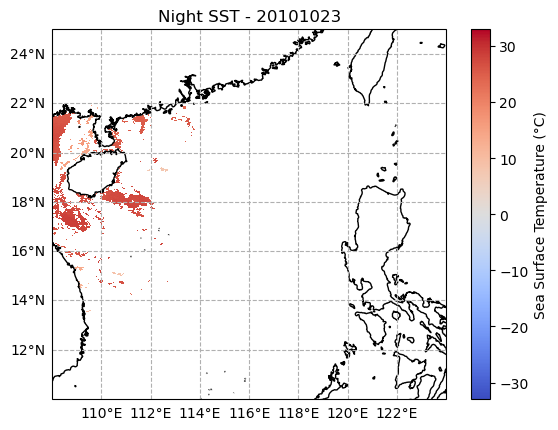

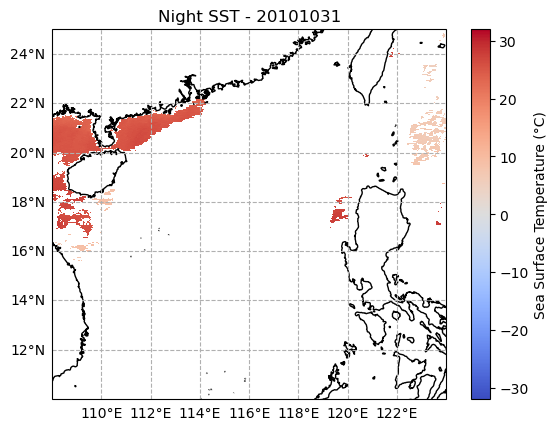

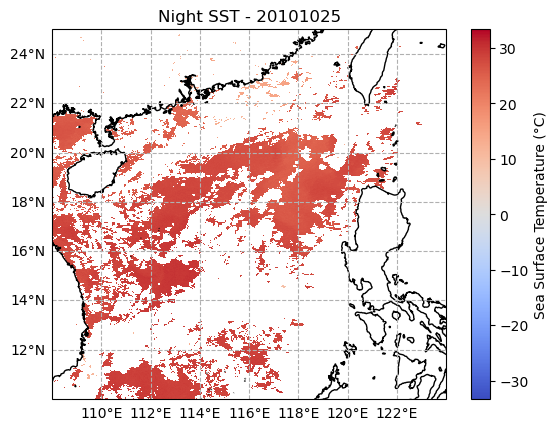

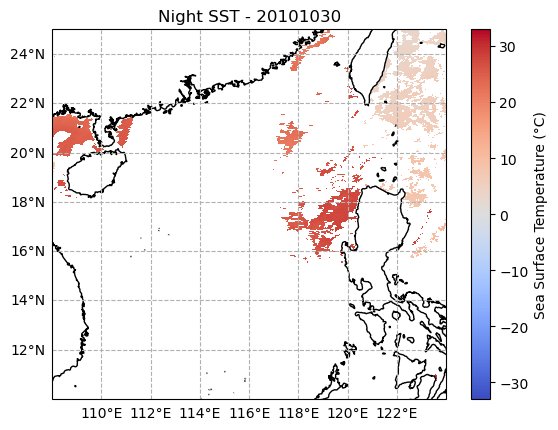

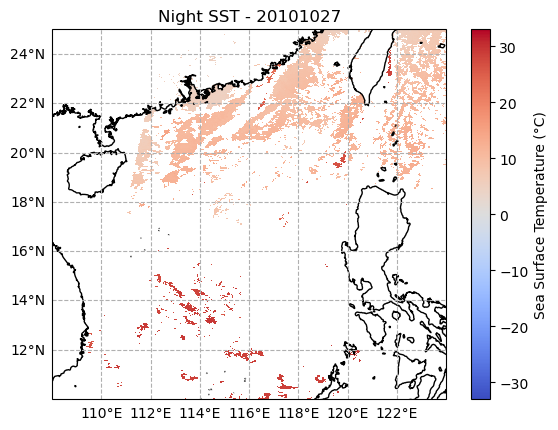

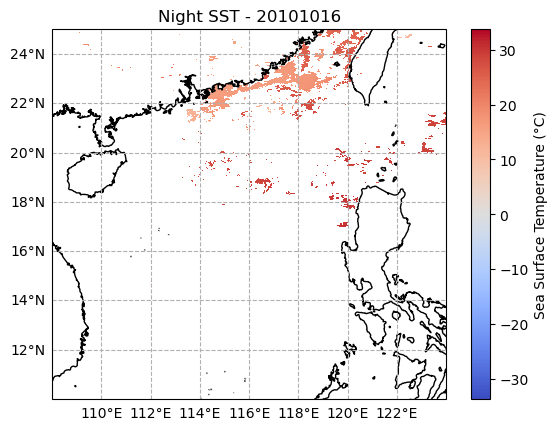

SST 圖像生成完成！


In [4]:
# 讀取數據文件並分類為白天和夜晚
day_files = glob.glob(f"{dtype}/{date}*day*.nc")   # 選擇白天的文件
night_files = glob.glob(f"{dtype}/{date}*night*.nc") # 選擇夜晚的文件

# 定義繪圖函數
def plot_sst(data_file, time_label):
    # 讀取數據
    dataset = xr.open_dataset(data_file, engine="netcdf4")
    sst = dataset['sea_surface_temperature'] - 273.15  # 轉換為攝氏溫度

    # 檢查質量等級並篩選
    sst_filtered = sst.where(dataset.pathfinder_quality_level >= 3, drop=True)
    
    # 繪製圖像
    if sst_filtered.size > 0:
        ax = plt.axes(projection=ccrs.PlateCarree())
        sst_filtered.mean(dim='time', skipna=True).plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Sea Surface Temperature (°C)'})
        
        # 設置經緯度範圍
        ax.set_extent(extent, crs=ccrs.PlateCarree())

        # 添加地理特徵
        ax.add_feature(cf.COASTLINE)
        ax.add_feature(cf.BORDERS, linestyle=':')

        # 添加經緯度網格
        gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'size': 10, 'color': 'black'}
        gl.ylabel_style = {'size': 10, 'color': 'black'}
        
        # 從文件名中提取日期信息
        # 使用 os.path.basename 提取文件名，然後取前8位作為日期
        date_str = os.path.basename(data_file)[:8]  # 提取 "20101022"
        plt.title(f"{time_label} SST - {date_str}")  # 使用日期作為標題

        # 保存文件，包含日期和時間標籤以避免重複
        plt.savefig(f"{output_folder}/{time_label}_SST_{date_str}.png")
        plt.show()
        plt.close()
        


# 遍歷白天和夜晚的文件並繪圖
for day_file in day_files:
    plot_sst(day_file, "Day")

for night_file in night_files:
    plot_sst(night_file, "Night")

print("AVHRR SST image done！")
